In [1]:
library(ggplot2)
library(glue)
library(magrittr)
library(tidyverse) 
library(SimInf)

rm(list = ls())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()


In [27]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=7, repr.plot.height=7)

### Introductory code

### Simple SIR model 

In [28]:
transitions <- c("S -> beta*S*I/(S+I+R) -> I",
                 "I -> gamma*I -> R")
compartments <- c("S", "I", "R")

In [122]:
n <- 1000
u0 <- data.frame(S = rep(100000, n), I = rep(5, n), R = rep(0, n))

model <- mparse(transitions = transitions,
                compartments = compartments,
                gdata = c(beta = 0.16, gamma = 0.077),
                u0 = u0,
                tspan = 1:150)

In [123]:
st_time <- Sys.time()
result <- run(model)
end_time <- Sys.time()
print(glue(end_time - st_time, "\n\n------"))
result

1.10639595985413

------


Model: SimInf_model
Number of nodes: 1000
Number of transitions: 2
Number of scheduled events: 0

Global data
-----------
 Parameter Value
 beta      0.160
 gamma     0.077

Compartments
------------
     Min. 1st Qu. Median   Mean 3rd Qu.   Max.
 S  20984   63850  97135  81091   99885 100000
 I      0      63   1472   5268   11098  17570
 R      0      57   1402  13645   21595  74908

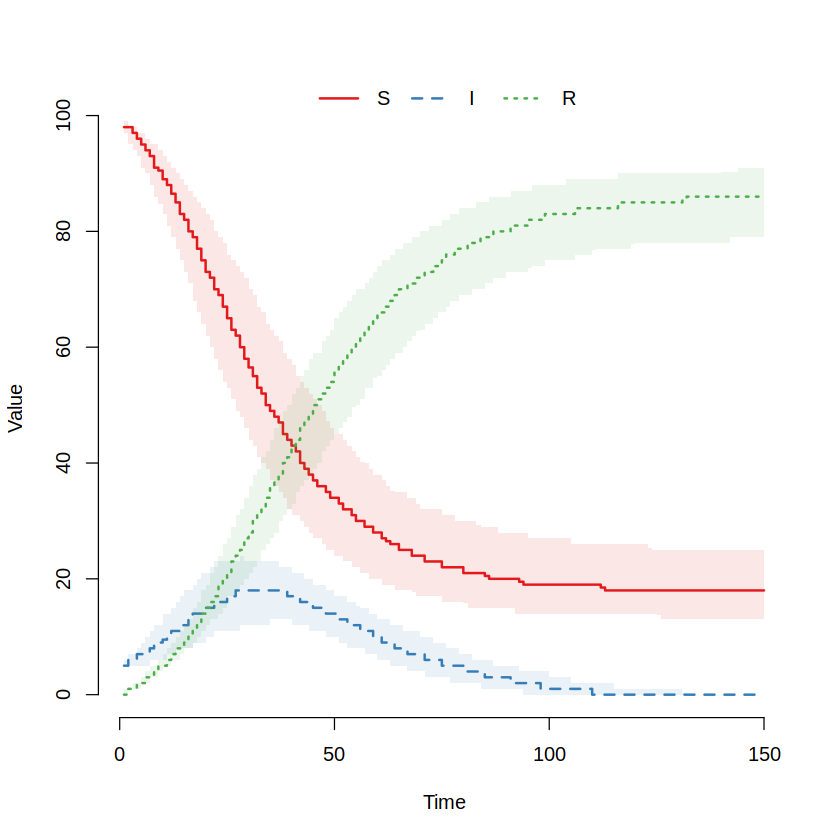

In [32]:
plot(result)

In [33]:
trajectory(result) %>% head

,node,time,S,I,R
,<int>,<int>,<int>,<int>,<int>
1,1,1,99,4,1
2,2,1,98,4,2
3,3,1,99,5,0
4,4,1,99,5,0
5,5,1,97,7,0
6,6,1,99,4,1


In [69]:
df_res = trajectory(result)

In [70]:
df_res %>% dim 

[1] 150000      5

In [71]:
df_res %>% names

[1] "node" "time" "S"    "I"    "R"

In [74]:
df_res$node %>% table %>% head(50)

.
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 
 41  42  43  44  45  46  47  48  49  50 
150 150 150 150 150 150 150 150 150 150 

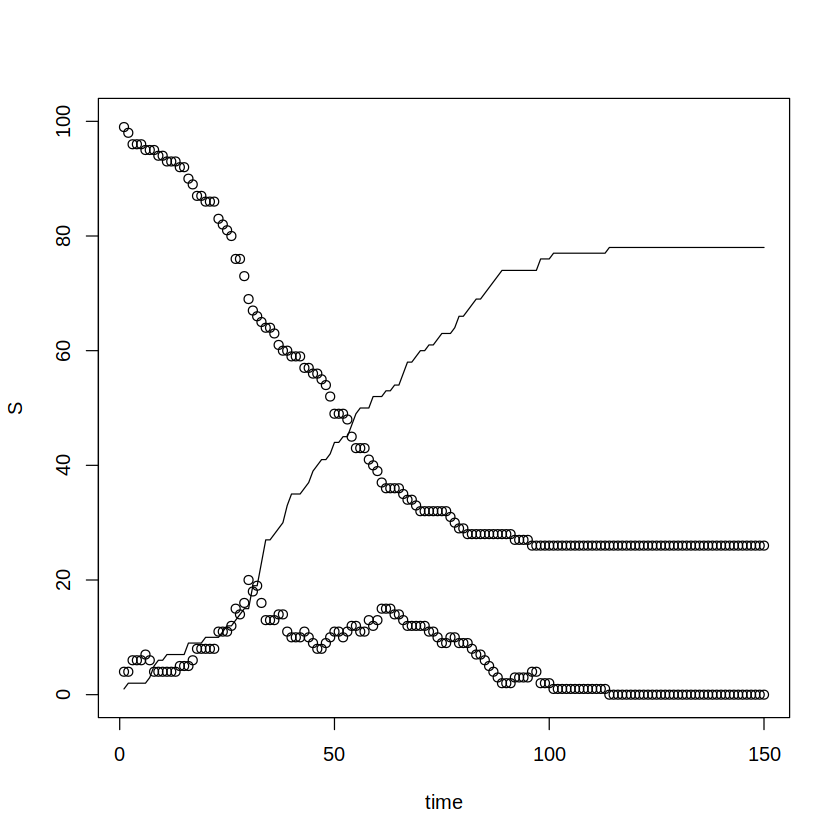

In [75]:
df1 = df_res[df_res$node == 1, ]
df2 = df_res[df_res$node == 2, ]
with(df1, {
     plot(time, S, ylim=c(0,100))
     points(time, I)
     lines(time, R)
    })

### Structure of objects

In [76]:
model@S

3 x 2 sparse Matrix of class "dgCMatrix"
   1  2
S -1  .
I  1 -1
R  .  1

In [77]:
model@u0

S,99,99,99,99,99,99,99,99,99,99,⋯,99,99,99,99,99,99,99,99,99,99
I,5,5,5,5,5,5,5,5,5,5,⋯,5,5,5,5,5,5,5,5,5,5
R,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [78]:
model@G

2 x 2 sparse Matrix of class "dgCMatrix"
                           1 2
S -> beta*S*I/(S+I+R) -> I 1 1
I -> gamma*I -> R          1 1

In [79]:
str(model)

Formal class 'SimInf_model' [package "SimInf"] with 13 slots
  ..@ G       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:4] 0 1 0 1
  .. .. ..@ p       : int [1:3] 0 2 4
  .. .. ..@ Dim     : int [1:2] 2 2
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:2] "S -> beta*S*I/(S+I+R) -> I" "I -> gamma*I -> R"
  .. .. .. ..$ : chr [1:2] "1" "2"
  .. .. ..@ x       : num [1:4] 1 1 1 1
  .. .. ..@ factors : list()
  ..@ S       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:4] 0 1 1 2
  .. .. ..@ p       : int [1:3] 0 2 4
  .. .. ..@ Dim     : int [1:2] 3 2
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:3] "S" "I" "R"
  .. .. .. ..$ : chr [1:2] "1" "2"
  .. .. ..@ x       : num [1:4] -1 1 -1 1
  .. .. ..@ factors : list()
  ..@ U       : int[0 , 0 ] 
  ..@ U_sparse:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int(0) 
  .. .. ..@ p       : int 0
  .. .. ..@ Dim     :

## SISe_sp
See 4.2. in vignette, https://cran.r-project.org/web/packages/SimInf/vignettes/SimInf.pdf 

In [106]:
SISe_sp

function (u0, tspan, events = NULL, phi = NULL, upsilon = NULL, 
    gamma = NULL, alpha = NULL, beta_t1 = NULL, beta_t2 = NULL, 
    beta_t3 = NULL, beta_t4 = NULL, end_t1 = NULL, end_t2 = NULL, 
    end_t3 = NULL, end_t4 = NULL, coupling = NULL, distance = NULL) 
{
    compartments <- c("S", "I")
    u0 <- check_u0(u0, compartments)
    if (is.null(phi)) 
        phi <- 0
    phi <- rep(phi, length.out = nrow(u0))
    check_infectious_pressure_arg(nrow(u0), phi)
    check_gdata_arg(upsilon, gamma, alpha, beta_t1, beta_t2, 
        beta_t3, beta_t4, coupling)
    check_integer_arg(end_t1, end_t2, end_t3, end_t4)
    end_t1 <- rep(end_t1, length.out = nrow(u0))
    end_t2 <- rep(end_t2, length.out = nrow(u0))
    end_t3 <- rep(end_t3, length.out = nrow(u0))
    end_t4 <- rep(end_t4, length.out = nrow(u0))
    check_end_t_arg(nrow(u0), end_t1, end_t2, end_t3, end_t4)
    check_distance_matrix(distance)
    E <- matrix(c(1, 0, 1, 1), nrow = 2, ncol = 2, dimnames = list(compartments, 
        c("1", "2")))
    G <- matrix(c(1, 1, 1, 1), nrow = 2, ncol = 2, dimnames = list(c("S -> upsilon*phi*S -> I", 
        "I -> gamma*I -> S"), c("1", "2")))
    S <- matrix(c(-1, 1, 1, -1), nrow = 2, ncol = 2, dimnames = list(compartments, 
        c("1", "2")))
    v0 <- matrix(as.numeric(phi), nrow = 1, byrow = TRUE, dimnames = list("phi"))
    ldata <- matrix(as.numeric(c(end_t1, end_t2, end_t3, end_t4)), 
        nrow = 4, byrow = TRUE, dimnames = list(c("end_t1", "end_t2", 
            "end_t3", "end_t4")))
    ldata <- .Call(SimInf_ldata_sp, ldata, distance, 1L)
    gdata <- as.numeric(c(upsilon, gamma, alpha, beta_t1, beta_t2, 
        beta_t3, beta_t4, coupling))
    names(gdata) <- c("upsilon", "gamma", "alpha", "beta_t1", 
        "beta_t2", "beta_t3", "beta_t4", "coupling")
    model <- SimInf_model(G = G, S = S, E = E, tspan = tspan, 
        events = events, ldata = ldata, gdata = gdata, u0 = u0, 
        v0 = v0)
    as(model, "SISe_sp")
}
<bytecode: 0x557f23e45540>
<environment: namespace:SimInf>

In [107]:
data("nodes", package = "SimInf")
u0 <- u0_SISe()
print(cat("u0 dim: ", u0 %>% dim, "  "))

events <- events_SISe()
d_ik <- distance_matrix(x = nodes$x, y = nodes$y, cutoff = 2500)
set.seed(123)
i <- sample(x = 1:1600, size = 160)
u0$I[i] <- as.integer(u0$S[i] * 0.05)
u0$S[i] <- u0$S[i] - u0$I[i]
model <- SISe_sp(u0 = u0, tspan = 1:1460, events = events, phi = 0,
    upsilon = 0.012, gamma = 0.1, alpha = 1, beta_t1 = 0.10,
    beta_t2 = 0.12, beta_t3 = 0.12, beta_t4 = 0.10, end_t1 = 91,
    end_t2 = 182, end_t3 = 273, end_t4 = 365, distance = d_ik,
    coupling = 0.2)

u0 dim:  1600 2   NULL


In [108]:
model

Model: SISe_sp
Number of nodes: 1600
Number of transitions: 2
Number of scheduled events: 466692

Global data
-----------
 Parameter Value
 upsilon   0.012
 gamma     0.100
 alpha     1.000
 beta_t1   0.100
 beta_t2   0.120
 beta_t3   0.120
 beta_t4   0.100
 coupling  0.200

Continuous state variables
--------------------------
 - Empty, please run the model first

Compartments
------------
 - Empty, please run the model first

In [109]:
model@S

2 x 2 sparse Matrix of class "dgCMatrix"
   1  2
S -1  1
I  1 -1

In [110]:
model@u0

S,143,133,93,84,111,123,156,129,101,87,⋯,170,155,71,122,113,89,111,103,160,168
I,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,4,0,0,0,0


In [112]:
model@G

2 x 2 sparse Matrix of class "dgCMatrix"
                        1 2
S -> upsilon*phi*S -> I 1 1
I -> gamma*I -> S       1 1